# Ejemplos Básicos

* Obtener la Ruta más rápida
* Volumen perfecto para estudiar tu música favorita
    * Este problema tiene condiciones
* Mas tiempo de sueño... 
* Más nutrientes de los productos con menor precio...

¿Qué es Optimización? 
* Obtener los máximos o mínimos de una función objetivo.
* La Función objetivo es la entidad matemática que vamos a optimizar. Expresadas normalmente en ecuaciones matemáticas
* Variable algebraica, las variables que influyen en la función objetivo. 


Máximo y Mínimo

* Son limitaciones de dimensión
* Conceptos de punto de inflexión.

# Optimización 01: Gradiente

* Precio U = 35A + 208V

* Se considera que: A(290-100/V) = 5833.3

* V = 50/(T-20)

* Debemos crear una función, de Modo que U esté en función de T

U = (204165.5/330-2T) + 10400/(T-20)

* La temperatura T está limitada al rango [40,90]

¿Como plasmar una función en Matplotlib?

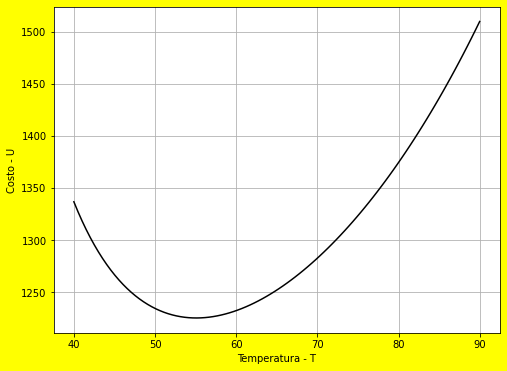

In [2]:
#Facilidad de Presentación Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Valores que limitan a T (Temperatura) en un intervalo [40,90] 
a = 40
b = 90 
#Defino T como los puntos (variable x que puede tomar.)
T = np.linspace(a,b,100) #¿Cuántos puntos? Serán 100 puntos. 
#Definimos nuestra función objetivo - U (que seria Y la variable dependiente.)
U = (204165.5/(330-2*T)) + (10400/(T-20))

#Podemos controlar los parámetros de la figura global
plt.figure(figsize=(8,6),facecolor="Yellow")
#Colocar los Datos que deseamos graficar X vs Y - "k" (Negro)
plt.plot(T,U,"k")
#Añadidos de Acompañiamiento
plt.xlabel("Temperatura - T")
plt.ylabel("Costo - U")
#Aparición de Celdas. 
plt.grid()
#Mostrar Gráficos. 
plt.show()


* A la derivada de una función objetivo se le llama gradiente

In [3]:
#Calculando el Gradiente de la función objetio - Usaremos Python
import sympy #Librería matemática de ecuaciones o afines. 
def calcularGradiente (): #Calcular la "Derivada"
    T = sympy.Symbol("T") #Convertimos a T en un simbolo
    funcion_u = (204165.5/(330-2*T)) + (10400/(T-20)) #Definimos la funcion_u
    #Derivada de una funcion
    derivada1 = sympy.diff(funcion_u) #Obtenemos su derivada.
    return funcion_u,derivada1 #Nos arrojara 

In [4]:
#Se retornan 2 para tener una facilidad a la hora de copiar la expresión sino..
a,b = calcularGradiente()
print(a)
print(b)

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [5]:
#Si no obtendría un aspecto mucho más matemático. 
calcularGradiente()[0]

10400/(T - 20) + 204165.5/(330 - 2*T)

In [6]:
#Lo mismo, obtenemos la derivada con mucha facilidad. 
calcularGradiente()[1]

-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2

In [7]:
#Definimos una función que nos permite evaluar un dato específico para la f.objetivo
def funcion_u(T):
    return 10400/(T - 20) + 204165.5/(330 - 2*T)
funcion_u(55.08)

1225.1656408350887

In [8]:
#Definimos
def derivada_u(T):
    return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
derivada_u(55.08)

-0.0022423688924249063

In [9]:
#Obtenemos los puntos donde la derivada se anula. 
def puntos_criticos():
    T = sympy.Symbol("T")
    return sympy.solve(-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2)

In [10]:
#Hallamos puntos críticos, donde la función no es derivale o cuando esta es 0
puntos_criticos()

[-47.9795750311863, 55.0835286102402]

# Conclusión:

* El Valor que se ajusta al intervalo es → 55.08 de Temperatura [40,90]

# Método de la Bisección

# Obtener el Número que Minimiza la Función

In [11]:
#Método de bisección
def biseccion():
    #Los valores del intevalo
    a = 40
    b = 90
    #Epsilon para definir el rompimiento de la funcion
    epsilon = 0.001
    #Mientras sea Verdadero el Bucle
    while(True):
        #Alpha es la semisuma de los limites del intervalo
        alpha = (a+b)/2
        #Primera derivada en a → Usamos la función anterior. 
        du_a = derivada_u (a) 
        #Primera derivada en alpha → Usamos la función anterior. 
        du_alpha = derivada_u(alpha) 

        #Si el producto de las derivadas evaluadas es menor a 0
        if(du_a*du_alpha< 0):
            #El limite superior del intervalo toma el valor de alpha
            b = alpha
        else:
            #Caso contrario el limite inferior toma el valor de alpha
            a = alpha
        
        #Condicion de Finalización
        #Si la diferencia absoluta de los limites es menor al epsilon, finalizamos.
        if(np.abs(a-b) < epsilon):
            break
    u_a = funcion_u(a)
    return a,u_a
        


In [12]:
biseccion()

(55.08331298828125, 1225.1656368937722)

# Analisis de Rendimiento

In [13]:
#Método de bisección
def biseccion_rendimiento():
    #Los valores del intevalo
    a = 40
    b = 90
    #Contador para las respectivas iteraciones. 
    cont = 0
    #Registro donde obtendremos los datos de cada iteración
    registro = []
    #Epsilon para definir el rompimiento de la funcion
    epsilon = 0.001
    #Mientras sea Verdadero el Bucle
    while(True):
        #Alpha es la semisuma de los limites del intervalo
        alpha = (a+b)/2
        #Primera derivada en a → Usamos la función anterior. 
        du_a = derivada_u (a) 
        #Primera derivada en alpha → Usamos la función anterior. 
        du_alpha = derivada_u(alpha) 

        #Si el producto de las derivadas evaluadas es menor a 0
        if(du_a*du_alpha< 0):
            #El limite superior del intervalo toma el valor de alpha
            b = alpha
        else:
            #Caso contrario el limite inferior toma el valor de alpha
            a = alpha
        u_a = funcion_u(a)
        #Condicion de Finalización
        #Si la diferencia absoluta de los limites es menor al epsilon, finalizamos.
        if(np.abs(a-b) < epsilon):
            print("-------------------------------------------------------")
            #Se imprime, conteo o iteración, el valor del límite inferior, y el valor de la funcion evaluada en ese punto.
            print("It:{:02} - TEMP: {:.10f} - Costo{:.10f}".format(cont,a,u_a))
            break
        #Un simple contador
        cont +=1
        #Agregamos esa terna de datos en un registro. 
        registro.append([cont,a,u_a])
        #Replicamos la impresión de cada iteración por el bucle
        print("It:{:02} - TEMP: {:.10f} - Costo{:.10f}".format(cont,a,u_a))
    #La función retorna el registro. 
    return registro
            
   


In [14]:
reg_1 = biseccion_rendimiento()

It:01 - TEMP: 40.0000000000 - Costo1336.6620000000
It:02 - TEMP: 52.5000000000 - Costo1227.4022222222
It:03 - TEMP: 52.5000000000 - Costo1227.4022222222
It:04 - TEMP: 52.5000000000 - Costo1227.4022222222
It:05 - TEMP: 54.0625000000 - Costo1225.5036361287
It:06 - TEMP: 54.8437500000 - Costo1225.1839888051
It:07 - TEMP: 54.8437500000 - Costo1225.1839888051
It:08 - TEMP: 55.0390625000 - Costo1225.1662656061
It:09 - TEMP: 55.0390625000 - Costo1225.1662656061
It:10 - TEMP: 55.0390625000 - Costo1225.1662656061
It:11 - TEMP: 55.0634765625 - Costo1225.1657646744
It:12 - TEMP: 55.0756835938 - Costo1225.1656564351
It:13 - TEMP: 55.0817871094 - Costo1225.1656378426
It:14 - TEMP: 55.0817871094 - Costo1225.1656378426
It:15 - TEMP: 55.0833129883 - Costo1225.1656368938
-------------------------------------------------------
It:15 - TEMP: 55.0833129883 - Costo1225.1656368938


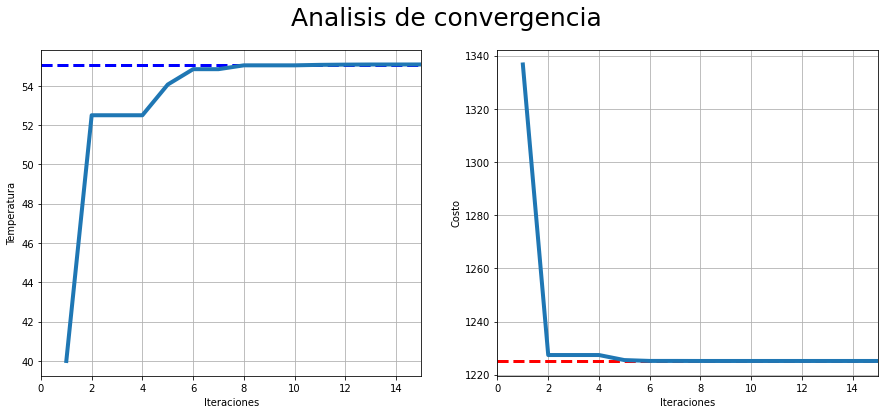

In [15]:
#Grafico de evaluaciones
def evaluacion(reg): #El parámetro es el registro
    reg  = np.array(reg) #El registro se transforma en numpy
    fig,axs = plt.subplots(1,2,figsize=(15,6)) #Creamos dos gráficos- Tamaño
    #Título del Gráfico fig en general, de tamaño fuente 25
    fig.suptitle("Analisis de convergencia",fontsize=25)
    
    #Primer Asíntota o límite, esto de la temperatura - "detalles"
    axs[0].axhline(55.08,color="blue",linestyle="--",linewidth=3)
    #Gráficamos los ejes X y Y (Iteraciones o conteo vs Temperatura)
    axs[0].plot(reg[:,0],reg[:,1],linewidth=4)
    #Detalles de Producción
    axs[0].set_xlabel("Iteraciones")
    axs[0].set_ylabel("Temperatura")
    axs[0].grid()
    #El Límite de las X es de 0 a 15
    axs[0].set_xlim([0,15])
    #axs[0].set_ylim([40,90]) → Límite hipotético de Y

    #Lo mismo aplicamos para el siguiente gráfico
    axs[1].axhline(1225.17,color="red",linestyle="--",linewidth=3)
    axs[1].plot(reg[:,0],reg[:,2],linewidth=4)
    axs[1].set_xlabel("Iteraciones")
    axs[1].set_ylabel("Costo")
    axs[1].grid()
    axs[1].set_xlim([0,15])

    #Muestra el Gráfico
    plt.show()
#Evaluamos el Registro. 
evaluacion(reg_1)

# Método de Newton Raphson

In [16]:
def plotPuntos(a,b):
    T = np.linspace(a,b,100)
    U = 10400/(T - 20) + 204165.5/(330 - 2*T)
    return T,U

In [17]:
def GraficarFuncionObjetivo():
    a,b = 40,90
    T,U = plotPuntos(a,b)
    plt.plot(T,U,"b")
    plt.plot(55.08,1225.17,"ko")
    plt.annotate(r"$55.08,1225.17$",(55.08,1225.17),(50,1250))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()

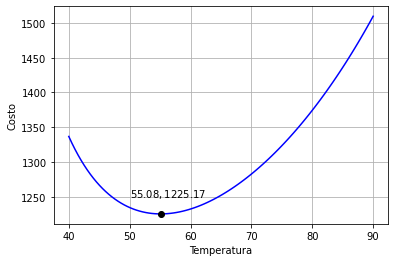

In [18]:
GraficarFuncionObjetivo()

In [19]:
def calcularGradiente_doble():
    T = sympy.Symbol("T")
    U = (10400/(T - 20) + 204165.5/(330 - 2*T))
    derivada_1 = sympy.diff(U)
    derivada_2 = sympy.diff(derivada_1)
    print(U)
    print(derivada_1)
    print(derivada_2)

In [20]:
calcularGradiente_doble()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3


In [21]:
def derivada_seg_u (T):
    return 20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3

In [22]:
funcion_u(55.08)

1225.1656408350887

In [23]:
derivada_u(55.08)

-0.0022423688924249063

In [24]:
derivada_seg_u(55.08)

0.6355474551218123

* Algoritmo

In [25]:
def NewtonRaphson():
    a,b = 40,90
    x = 90 
    epsilon = 0.001

    cont = 0
    registro = []

    while(True):
        #Calculo de las derivadas. 
        d_x = derivada_u(x)
        d_2_x = derivada_seg_u(x)

        xprev = x
        x = xprev - (d_x/d_2_x)
        u_x = funcion_u(x)
        cont +=1
        registro.append([cont,x,u_x])
        print("It:{:02} - TEMP: {:.10f} - Costo{:.10f}".format(cont,x,u_x))

        if(np.abs(x-xprev)<=epsilon):
            print("---------------------------------------------------")
            print("It:{:02} - TEMP: {:.10f} - Costo: {:.10f}".format(cont,x,u_x))
            break

    return registro

In [26]:
reg = NewtonRaphson()

It:01 - TEMP: 60.5730595536 - Costo1233.8795849955
It:02 - TEMP: 54.3709476178 - Costo1225.3292441409
It:03 - TEMP: 55.0684488875 - Costo1225.1657091464
It:04 - TEMP: 55.0835219881 - Costo1225.1656368790
It:05 - TEMP: 55.0835286102 - Costo1225.1656368790
---------------------------------------------------
It:05 - TEMP: 55.0835286102 - Costo: 1225.1656368790


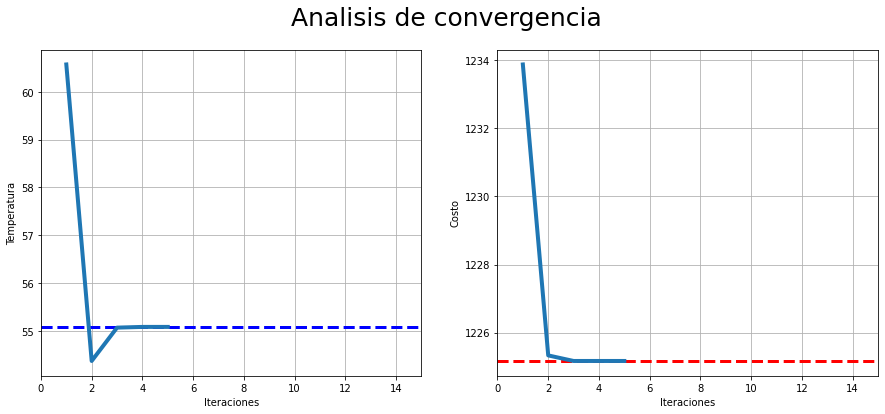

In [27]:
evaluacion(reg)

* Conclusión: En este caso el método de Newton Raphson es el mejor

# Método de la Secante

In [28]:
def Secante():
    a,b = 40,90
    epsilon = 0.01

    cont = 0
    registro = []

    while (True):
        #Calcular derivadas
        d_u_a = derivada_u(a)
        d_u_b = derivada_u(b)

        #Calcular alpha
        alpha = b - (d_u_b)/((d_u_b-d_u_a)/(b-a))

        d_u_alpha = derivada_u(alpha)
        
        if(d_u_alpha > 0):
            b = alpha
        else:
            a = alpha
        
        u_alpha = funcion_u(alpha)
        cont = cont + 1
        registro.append([cont,alpha,u_alpha])
        print("It:{:02} - TEMP: {:.10f} - Costo{:.10f}".format(cont,alpha,u_alpha))

        if np.abs(d_u_alpha) <= epsilon:
            print("-------------------------------------------")
            print("It:{:02} - TEMP: {:.10f} - Costo{:.10f}".format(cont,alpha,u_alpha))
            break
    return registro



In [29]:
reg = Secante()

It:01 - TEMP: 67.4238416410 - Costo1265.4843547060
It:02 - TEMP: 60.8827888776 - Costo1234.8456727508
It:03 - TEMP: 57.9389356280 - Costo1227.6249518474
It:04 - TEMP: 56.5132183316 - Costo1225.7978324621
It:05 - TEMP: 55.8045366165 - Costo1225.3285410968
It:06 - TEMP: 55.4483617340 - Costo1225.2076290459
It:07 - TEMP: 55.2684366108 - Costo1225.1764608953
It:08 - TEMP: 55.1773211286 - Costo1225.1684267004
It:09 - TEMP: 55.1311231215 - Costo1225.1663559004
It:10 - TEMP: 55.1076851354 - Costo1225.1658221870
It:11 - TEMP: 55.0957904902 - Costo1225.1656846363
-------------------------------------------
It:11 - TEMP: 55.0957904902 - Costo1225.1656846363


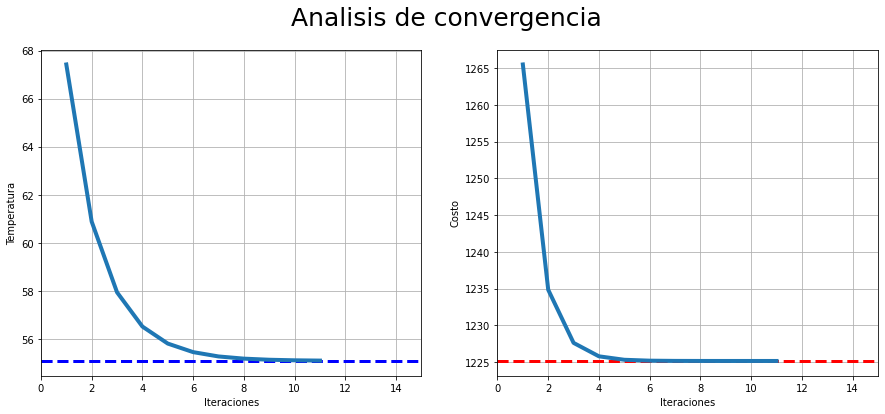

In [30]:
evaluacion(reg)

# Método de Optimización Fibonacci

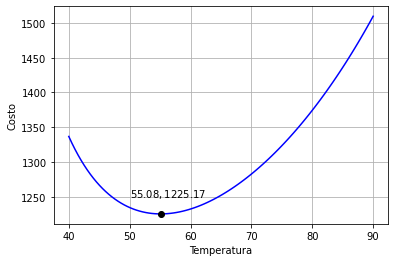

In [32]:
GraficarFuncionObjetivo()

In [33]:
funcion_u(55.08)

1225.1656408350887

Algoritmo

In [45]:
#Definicion de la Serie Fibonacci.
def CrearFibonacci():
    n = 30
    fs = [1,1]
    for i in range (n):
        aux = fs[-1] + fs[-2]
        fs.append(aux)
    return n,fs

In [46]:
n,fs = CrearFibonacci()

In [62]:
def Fibonacci(*param):
    a = param[0]
    b = param[1]
    k = param[2]
    it = param[3]
    reg = param[4]
    L = param[5]
    n = param[6]
    fs = param[7]
    ep = param[8]

    i_arriba = n-k + 1
    i_abajo = n + 1
    Lk = L*fs[i_arriba]/fs[i_abajo]
    xa = a + Lk
    xb = b - Lk
    U_xa = funcion_u(xa)
    U_xb = funcion_u(xb)

    if(U_xa>U_xb):
        a = xa
    else:
        b = xb
    
    if(np.abs(U_xa-U_xb) > ep):
        k = k + 1
        it = it + 1

        reg.append([it,xa,U_xa])
        print("It:{:02} - TEMP: {:.10f} - Costo {:.10f}".format(it,xa,U_xa))
        return Fibonacci(a,b,k,it,reg,L,n,fs,ep)
    else:
        print("------------------------------------------------")
        print("It:{:02} - TEMP: {:.10f} - Costo {:.10f}".format(it,xa,U_xa))
        return reg



In [70]:
def RunFibonacci(n,fs):
    a,b,k = 40,90,2
    L = b -a 

    return Fibonacci(a,b,k,0,[],L,n,fs,1e-4)
     
    

In [71]:
reg = RunFibonacci(n,fs)

It:01 - TEMP: 59.0983005625 - Costo 1229.9349491623
It:02 - TEMP: 51.8033988750 - Costo 1228.8272286788
It:03 - TEMP: 47.2949016875 - Costo 1248.2990546850
It:04 - TEMP: 51.8033988750 - Costo 1228.8272286788
It:05 - TEMP: 54.5898033750 - Costo 1225.2438371362
It:06 - TEMP: 53.5254915625 - Costo 1225.9614290233
It:07 - TEMP: 54.5898033750 - Costo 1225.2438371362
It:08 - TEMP: 55.2475842500 - Costo 1225.1741606876
It:09 - TEMP: 54.9963343125 - Costo 1225.1680564661
It:10 - TEMP: 54.8410533125 - Costo 1225.1844049120
It:11 - TEMP: 54.9963343125 - Costo 1225.1680564661
It:12 - TEMP: 55.0923032499 - Costo 1225.1656613366
It:13 - TEMP: 55.0556463752 - Costo 1225.1658840054
It:14 - TEMP: 55.0923032499 - Costo 1225.1656613366
------------------------------------------------
It:14 - TEMP: 55.0783015633 - Costo 1225.1656455603


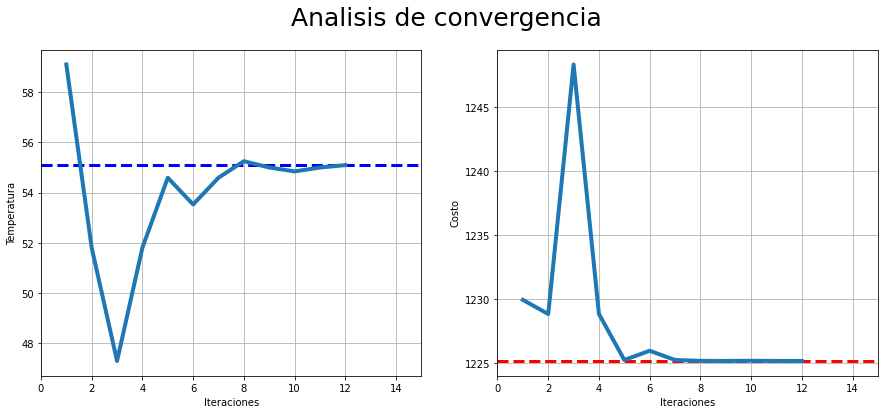

In [69]:
evaluacion(reg)